26


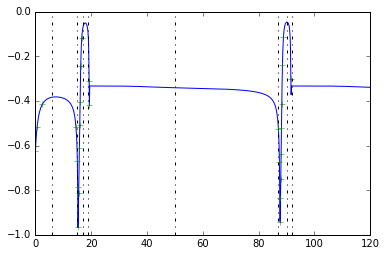

In [27]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import Example1
from timevarying_covar import time_discretisation_handler

odeModel = Example1.nonlinearFrictionODE()


dim = 2
initCond = [0., 0.5, 0.8]
tt = np.linspace(0., 120, 1000)

sol = odeModel.solve(initCond, tt)

eigVal = []
for i in range(tt.size):
    A = odeModel.dXdt_Jac(sol[i,:2])
    la, UA = np.linalg.eig(A)
    eigVal.append(la)
eigVal = np.array(eigVal)

tk = np.array([6, 15, 17, 19, 50, 87, 90, 92, 120])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(tt, np.real(eigVal[:,0]))
#ax.plot(tt, np.real(eigVal[:,1]))

for t in tk:
    ax.plot([t, t], [-1. , 0.], 'k-.')

changePoints = 0.
eCur = max(np.real(eigVal[0,]))

TT = [0.]
LL = [eCur]

for i in range(tt.size):
    e = max(np.real(eigVal[i,]))
    if abs(e - eCur) > 0.1:
        TT.append(tt[i])
        LL.append(e)
        eCur = e

print len(LL)
ax.plot(TT, LL, '+')
plt.show()


In [29]:
from core import makeCovarMat_sqExpk_specDecomp_noSens_2 as makeCov

In [229]:
x = sol[100,:2]
y = sol[800,:2]

A = odeModel.dXdt_Jac(x)
B = odeModel.dXdt_Jac(y)

Aeig, UA = np.linalg.eig(A)
UAinv = np.linalg.inv(A)

Beig, UB = np.linalg.eig(B)
UBinv = np.linalg.inv(B)

ss = np.array([1.])
tt = np.array([1.5])
#tt = np.linspace(0., 5., 15)

lScales = np.array([1., 10.])
cScales = np.array([0., 1.])

#print Aeig
#print Beig
k = makeCov(ss, tt, (Aeig, UA, UAinv), (Beig, UB, UBinv), lScales, cScales, 2, 0. ,0.)
print k

c = 5.

cc = cScales*c**2
ll = lScales/c

ssR = ss/c
ttR = tt/c


kr = makeCov(ssR, ttR, (Aeig*c, UA, UAinv), (Beig*c, UB, UBinv), ll, cc, 2, 0. ,0.)

print kr

#for t in tt:
#    ss = np.array([t])
#    k = makeCov(ss, tt, (Aeig, UA, UAinv), (Beig, UB, UBinv), lScales, cScales, 2, 0. ,0.)
#print "DONE"

[[-0.94751797 -0.28427453]
 [ 0.38269322  0.1148157 ]]
[[-0.94751797 -0.28427453]
 [ 0.38269322  0.1148157 ]]


In [224]:
from scipy.integrate import quad

def g(t):
    return np.exp(-0.5*t)

def integrand(t):
    return np.exp(-3*t**2)*g(t)

c = 5
def integrand2(s):
    return integrand(c*s)

a = 0.
b = 1.

print quad(integrand, a, b)[0]
print quad(integrand2, a/c, b/c)[0]*c


0.433773972832
0.433773972832


In [170]:
from scipy.special import erf

def linexperfInf_nzb(a, b, lower, upper):
    expr1 = np.exp(0.25*b**2)*erf(0.5*b - upper) + np.exp(b*upper)*erf(upper)
    expr2 = np.exp(0.25*b**2)*erf(0.5*b - lower) + np.exp(b*lower)*erf(lower)
    return np.exp(a)*(expr1 - expr2)/b

def linexperfInf_nzb_logOF(a, b, lower, upper):
    expr1 = 0.25*b**2 + np.log(erf(0.5*b - upper)) + b*upper + np.log(erf(upper))
    expr2 = 0.25*b**2 + np.log(erf(0.5*b - lower)) + b*lower + np.log(erf(lower))
    
def result(a, b, lower, upper):
    A = np.exp(0.25*b**2)*erf(0.5*b - upper) - np.exp(0.25*b**2)*erf(0.5*b - lower) + np.sign(b)*1e-8
    B = np.exp(b*upper)*erf(upper) - np.exp(b*lower)*erf(lower)
    A /= b
    B /= b
    
    logA = 0.25*b**2 + np.log(erf(0.5*b-upper)/b - erf(0.5*b-lower)/b + 1e-8)
    log_res = a + np.log(A) + np.log(1 + B*b*np.exp(-0.25*b**2)/(erf(0.5*b-upper) - erf(0.5*b-lower) + 1e-8) )
    return np.exp(log_res)

b = -15.
upper = 10.
lower = 0.
x = linexperfInf_nzb(0., b, lower, upper)
y = result(0., b, lower, upper)
print x, y
#print x,y



-0.0 6.66666666667e-10


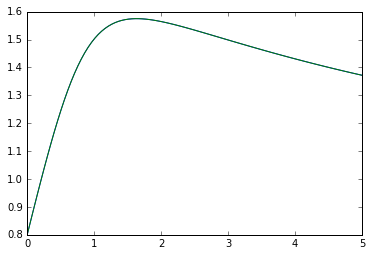

In [187]:
from scipy.integrate import odeint

def dYdt(Y,t):
    return -Y*(1-Y)**2 + np.exp(-0.4*t)

def dZdt(Z, t, c):
    return c*dYdt(Z, c*t)

tt = np.linspace(0., 5., 100)
y0 = 0.8
z0 = 0.8

ss = np.linspace(0., 1., 100)
c = 5.

ysol = odeint(dYdt, y0, tt)
zsol = odeint(dZdt, z0, ss, args=(c,))

plt.plot(tt, ysol)
plt.plot(c*ss, zsol)
plt.show()